In [1]:
# hi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [3]:
df = pd.read_csv("../assets/houses.csv")
df
# cleaning from Hakan

# removes about 1500 duplicates
df = df.drop_duplicates(subset=['location', 'price', 'area', 'building_condition'])
df

# removing any row that contains empty area information because it's a key feature
df = df.dropna(subset=['area', 'facade_count', 'price'])
#df.price.sort_values()
#print(df[df.price.isnull()])

In [4]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
ndf = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
#ndf.price.sort_values()

e:\install\python-win\python-3.7.10\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.
e:\install\python-win\python-3.7.10\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


In [5]:
#ndf

In [6]:
area = ndf.area.to_numpy().reshape(-1,1)
area.shape
price = ndf.price.to_numpy().reshape(-1,1)
price.shape
X_train, X_test, y_train, y_test = train_test_split(area, price, test_size=0.3)

In [7]:

reg = LinearRegression().fit(X_train,y_train)

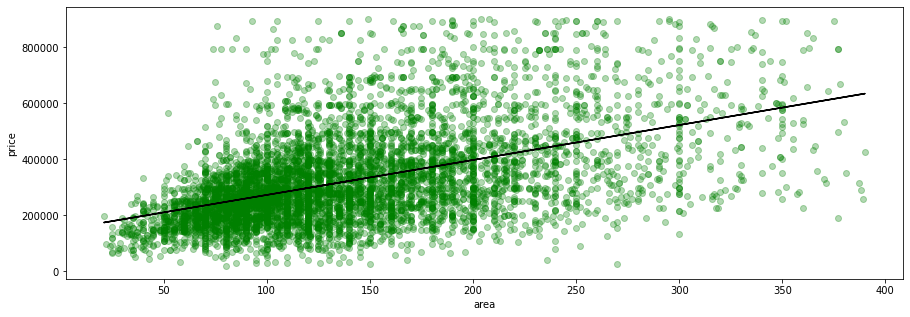

In [21]:
plt.figure(figsize = (15,5));

plt.scatter(ndf.area,ndf.price,c='green', alpha=0.3);

plt.plot(area,reg.predict(area), c='black');

plt.ticklabel_format(style="plain")
plt.xlabel('area');
plt.ylabel('price');
#plt.ylim(ymax=3500000,ymin=10)
#plt.xlim(xmax=1100,xmin=10)

In [19]:
#reg.score(price,reg.predict(price))
reg.score(X_test,y_test)
#0.22

0.225939460818817